1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


covariance matrix: 
 [[ 0.94716832  0.99958508  2.89392173]
 [ 0.99958508 10.51812558 12.51729574]
 [ 2.89392173 12.51729574 18.30513919]] 

eigenvalues:
  [2.78385976e+01+0.j 8.25023566e-16+0.j 1.93183546e+00+0.j]
eigenvectors:
 [[-0.10818689 -0.81649658  0.56712338]
 [-0.58639457 -0.40824829 -0.69962472]
 [-0.80276834  0.40824829  0.43462205]] 

eigenvalues (SVD):
  [2.79249365e+01 1.93348219e+00 4.29973240e-32]
eigenvectors (SVD): 
 [[-0.10792628  0.56717304 -0.81649658]
 [-0.58671599 -0.69935519 -0.40824829]
 [-0.80256854  0.43499088  0.40824829]] 

Percentage of total variability explained by principal components:
93.51089232475096 %
6.489107675249037 %
2.7712850665929466e-15 %


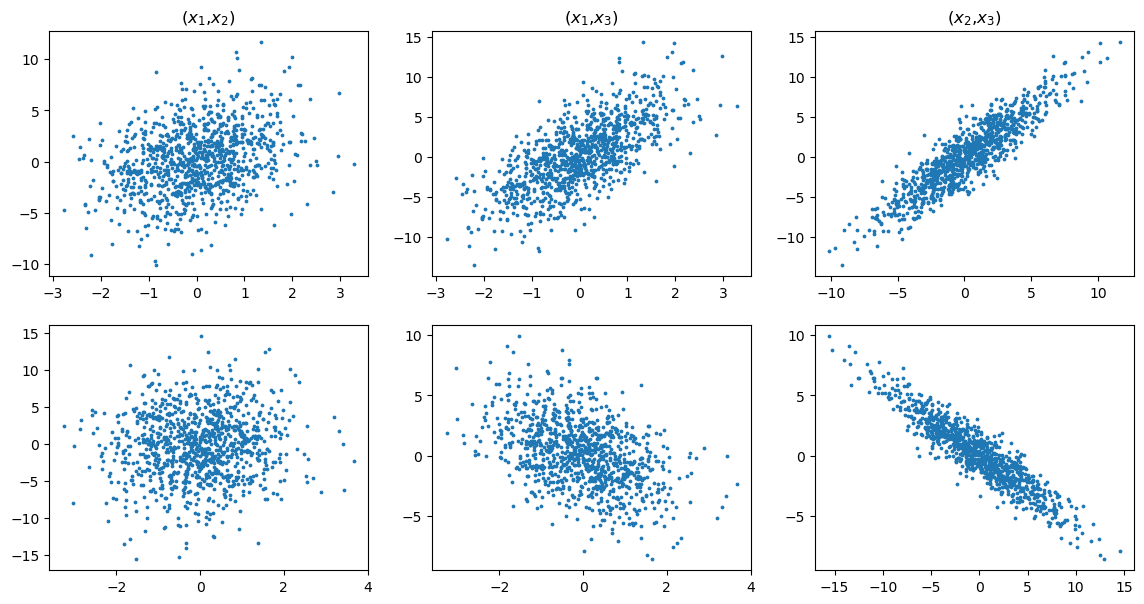

In [6]:
import numpy as np
import pandas as pd
from scipy import linalg as la
import matplotlib.pyplot as plt

N = 1000
x1 = np.random.normal(loc=0, scale=1, size=N)
x2 = x1 + np.random.normal(loc=0, scale=3, size=N)
x3 = 2*x1 + x2
data = pd.DataFrame({'x1': x1, 'x2': x2,'x3': x3})

cov = np.cov(data.T)
print('covariance matrix: \n', cov, '\n')

l, V = la.eig(cov) # l=autovalori, V=autovettori
print('eigenvalues:\n ', l)
print('eigenvectors:\n', V, '\n')

U, spectrum, Vt = np.linalg.svd(data.T)
l_svd = spectrum**2/(N-1)
V_svd = U
print('eigenvalues (SVD):\n ', l_svd)
print('eigenvectors (SVD): \n', V_svd, '\n')

explained_variability = l.real / np.sum(l.real)
print("Percentage of total variability explained by principal components:")
for v in explained_variability[np.argsort(-explained_variability)]:
    print(100 * v, '%')
    
reduced_data = data.loc[:,['x1','x2']]

rdata = pd.DataFrame(np.dot(V, data.T)).T #??
rdata.columns = ['x1', 'x2', 'x3']

fig, ax = plt.subplots(2, 3, figsize = (14,7))
ax[0,0].scatter(data["x1"], data["x2"], s=3)
ax[0,1].scatter(data["x1"], data["x3"], s=3)
ax[0,2].scatter(data["x2"], data["x3"], s=3)
ax[0,0].set_title('($x_1$,$x_2$)')
ax[0,1].set_title('($x_1$,$x_3$)')
ax[0,2].set_title('($x_2$,$x_3$)')
ax[1,0].scatter(rdata["x1"], rdata["x2"], s=3)
ax[1,1].scatter(rdata["x1"], rdata["x3"], s=3)
ax[1,2].scatter(rdata["x2"], rdata["x3"], s=3)
plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [7]:
for i in range(10):
    mean = np.random.uniform(-1,1)
    noise = np.random.normal(loc=mean, scale=1/50, size=N)
    data[f'x{i+4}'] = noise

cov = np.cov(data.T)
l, V = la.eig(cov)
explained_variability = l.real / np.sum(l.real)

print("Percentage of total variability explained by principal components:")
for v in explained_variability[np.argsort(-explained_variability)]:
    print(100 * v, '%')

Percentage of total variability explained by principal components:
93.49838442272615 %
6.488246733260075 %
0.001559565751166952 %
0.001541889132259316 %
0.0014660022435877304 %
0.0014067918492834993 %
0.0013388244633796163 %
0.0013106653446380275 %
0.0012474812816201844 %
0.0012091717250683621 %
0.0011848478322594223 %
0.0011036043905260058 %
3.5903449603551505e-15 %


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


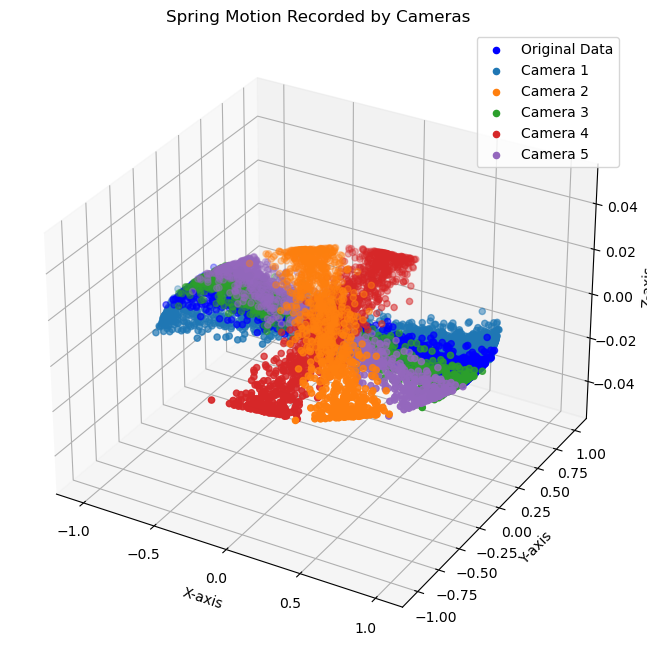

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)  # For reproducibility

# Simulate spring's motion along x-axis
t = np.linspace(0, 10, 1000)
spring_motion = np.sin(t)

# Add random noise along y-axis
noise = np.random.normal(0, 0.1, size=len(t))
spring_data = np.column_stack((spring_motion, noise))

# Number of cameras
n_cameras = 5

# Generate random angles in spherical coordinates for each camera
theta_phi_angles = np.random.rand(n_cameras, 2) * np.pi

# Function to rotate dataset based on spherical coordinates
def rotate_dataset(data, angles):
    theta, phi = angles
    rotation_matrix = np.array([
        [np.cos(phi), -np.sin(phi)],
        [np.sin(phi), np.cos(phi)]
    ])
    rotated_data = np.dot(data, rotation_matrix.T)
    return rotated_data

# Rotate the dataset for each camera
rotated_datasets = [rotate_dataset(spring_data, angles) for angles in theta_phi_angles]

# Combine the datasets from all cameras
combined_data = np.vstack(rotated_datasets)

# Perform PCA
cov_matrix = np.cov(combined_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Scatter plot showing the original and rotated datasets
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Original spring motion along x-axis
ax.scatter(spring_data[:, 0], spring_data[:, 1], c='b', label='Original Data')

# Rotated datasets from multiple cameras
for i, rotated_data in enumerate(rotated_datasets):
    ax.scatter(rotated_data[:, 0], rotated_data[:, 1], label=f'Camera {i+1}')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Spring Motion Recorded by Cameras')
ax.legend()
plt.show()

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [9]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

"wget" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.
"wget" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


In [10]:
import pandas as pd

# Replace 'magic04.data' with the actual path to your dataset
data = pd.read_csv('magic04.data', header=None)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Standardize the features
X_std = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

import matplotlib.pyplot as plt

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot explained variance ratio
plt.plot(explained_variance_ratio, marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Plot cumulative explained variance
plt.plot(cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Choose the number of components based on your analysis
n_components = 10  # Replace with the desired number

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

FileNotFoundError: [Errno 2] No such file or directory: 'magic04.data'